# Comparison Between Methods

We compare here the results obtained for the unperturbed Green's function in the MTI.
In the following, we refer to:

- i. *exact* solution, meaning the Green's function obtained by solving the system of coupled differential equations;

- ii. *approximated* solution, referring to the numerical solution obtained as a sum of wavefunctions and eigenenergies computed discretizing the MTI Hamiltonian on a finite lattice along $z$.


In [2]:
import nbimporter
import numpy as np

from Greens_Functions import GFexact
from Greens_Functions import GFapprox, eigenstates

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# parameters
kx = 0.0082; ky = 0.0054; L = 0.005; w = 0.01; Nstates = 250
# discrete lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# discretized eigenstates
lattice, egval, spinors = eigenstates(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L, Neig=Nstates)

### Green's Function

In [3]:
# compute exact Green's function on the lattice
gfexact = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in lattice])

# compute approximate Green's function with all states
gfapprox = np.array([ GFapprox(Nstates=Nstates, z=z, Z=z, kx=kx, ky=ky, L=L, w=w, egval=egval, spinors=spinors) for z in range(Nlat)])

#### <font color='green'> **Real Part** </font> 

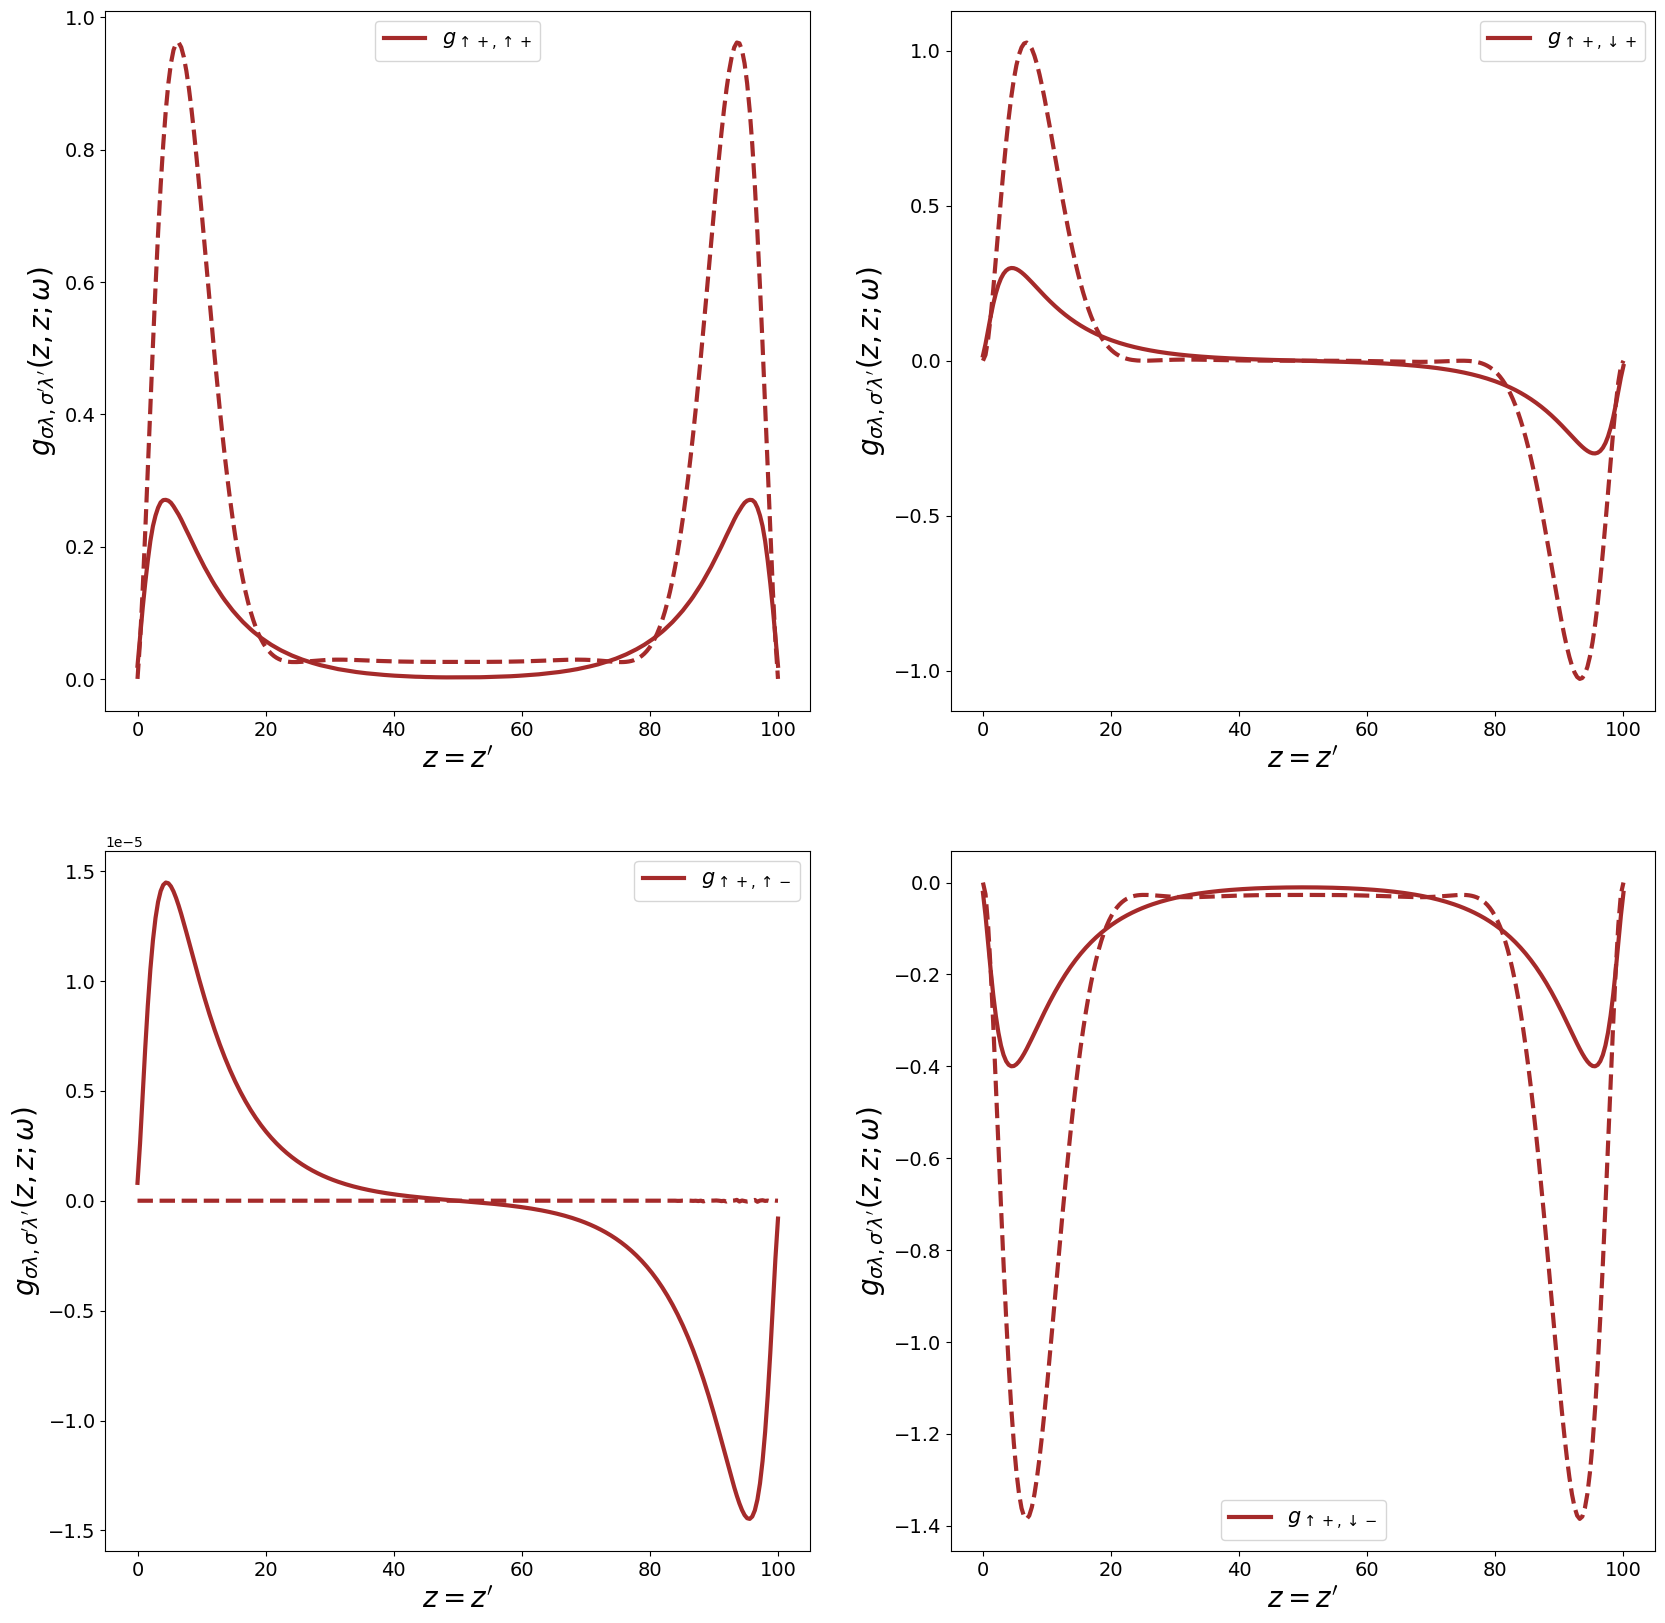

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# colors gradient
#cmap = plt.get_cmap('autumn_r', len(Nstates))

# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(1):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gfapprox[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=3, label=labels[irow][icol] )
        
        # plot exact results
        axs[iPic][jPic].plot(lattice, [gfexact[idx][irow][icol].real for idx in range(Nlat)], '--', c=colors[irow], lw=3)#, label=labels[irow][icol] )
    
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

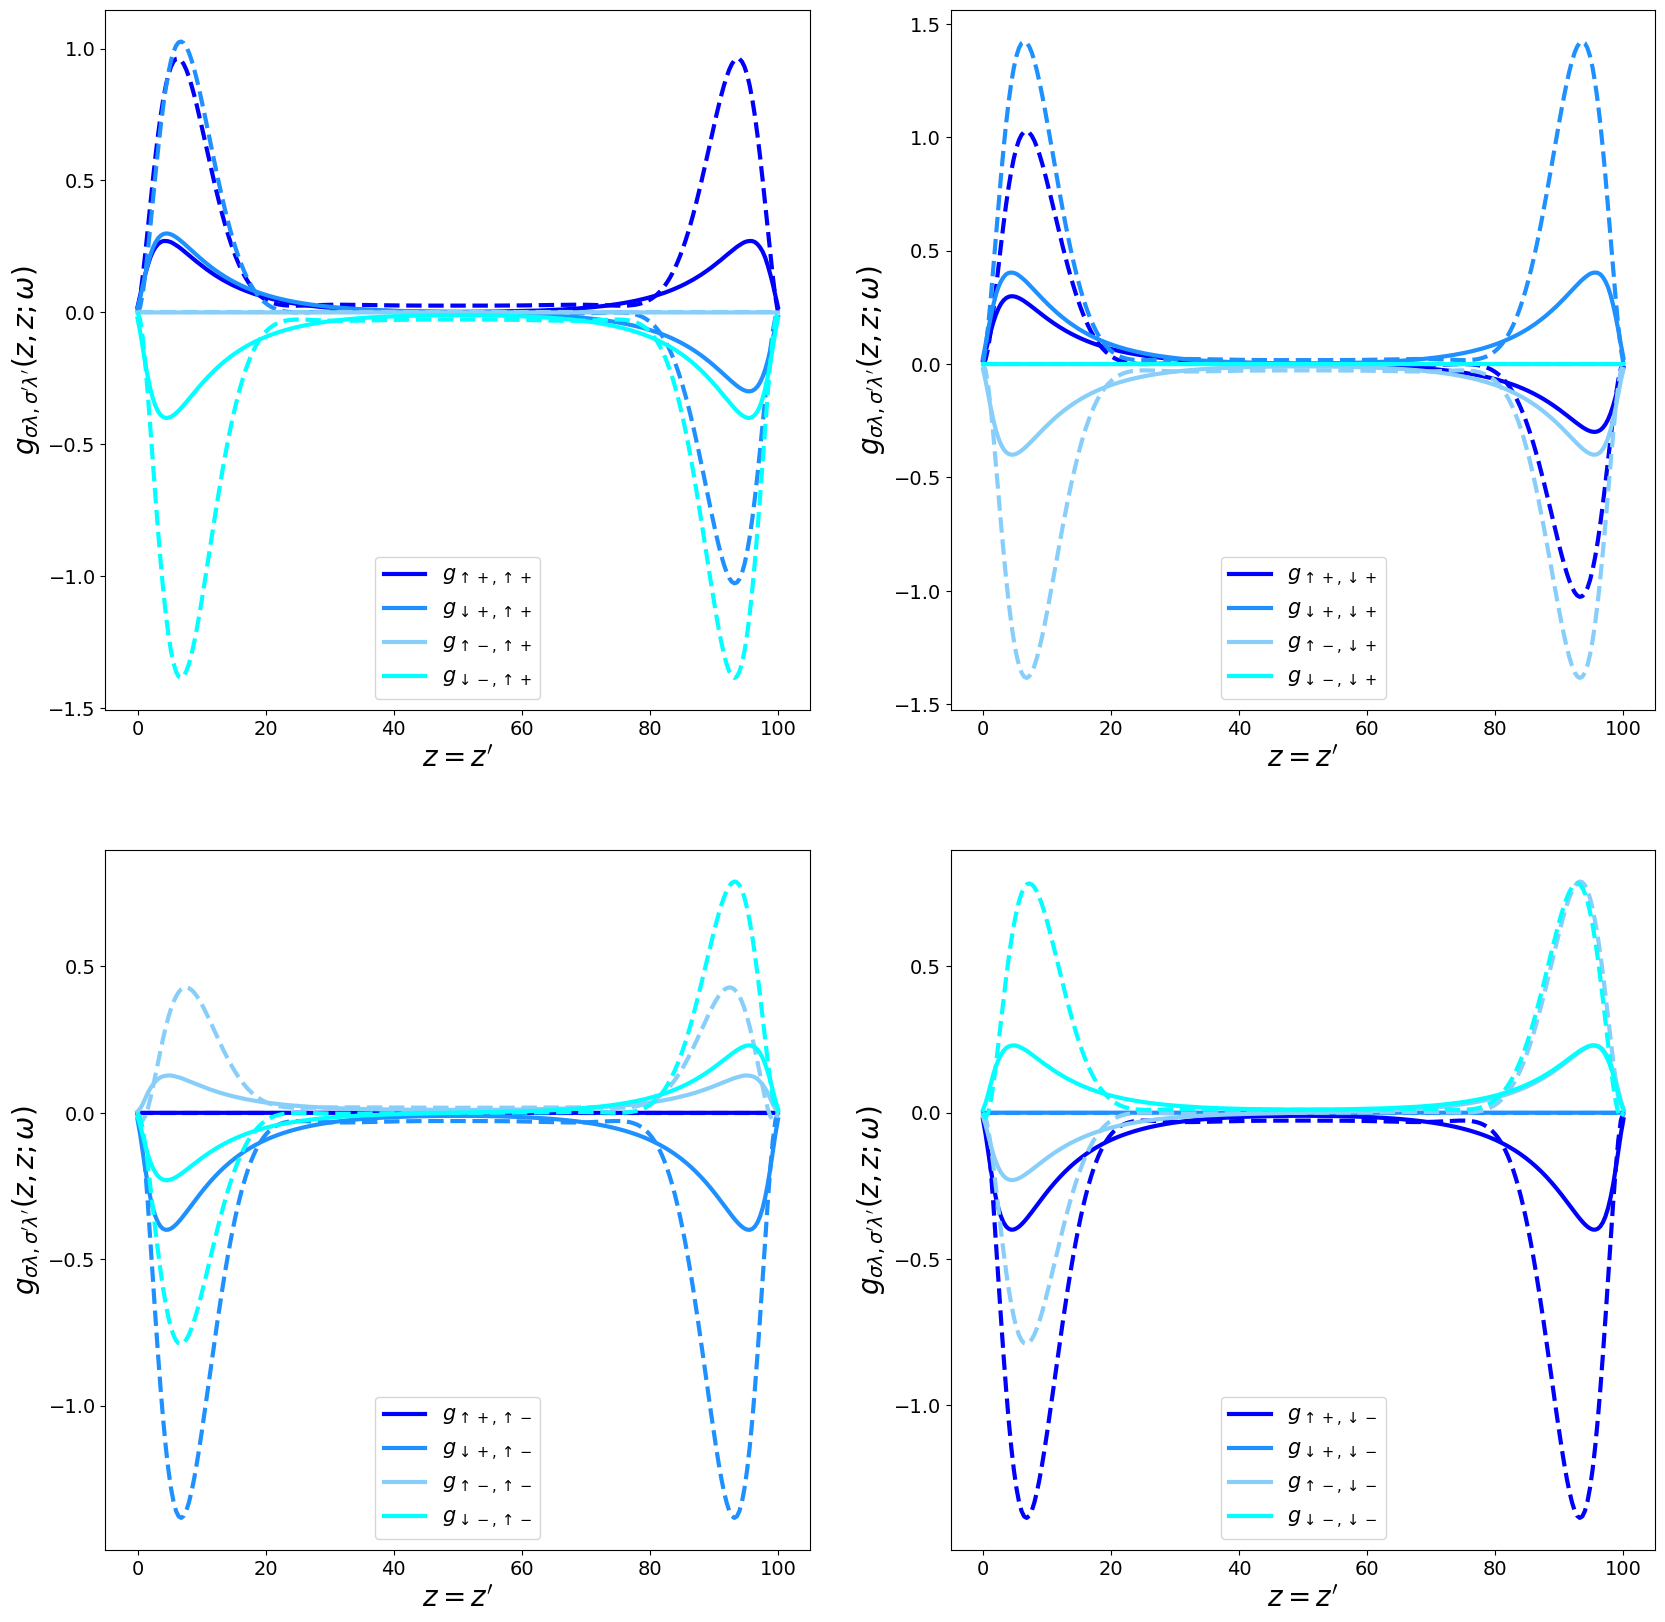

In [5]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot approximate results
        axs[iPic][jPic].plot(lattice, [gfapprox[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=3, label=labels[irow][icol] )
        
        # plot exact results
        axs[iPic][jPic].plot(lattice, [gfexact[idx][irow][icol].real for idx in range(Nlat)], '--', c=colors[irow], lw=3)#, label=labels[irow][icol] )
    
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);